In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/data_sale_bamland.csv', header=None)
columns = ['date', 'id_prd_to_plc', 'id_br','amount', 'price']
df.columns = columns
df.head()


df['total_price'] = df['price'] * df['amount']


def make_year(column):
    year = column.split('-')[0]
    return int(year)

def make_month(column):
    month = column.split('-')[1]
    return int(month)


def make_day(column):
    day = column.split('-')[2][0:2]
    return int(day)

def make_date(column):
    date = column.split(" ")[0]
    return date

df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['date'] = df['date'].apply(make_date)

def convert_prd(column):
  if column == 401:
    return 1397
  if column == 901:
    return 1398
  if column == 1001:
    return 1399
  if column == 1101:
    return 1400
  if column == 1201:
    return 1401
  elif column == 1301:
    return 1402


df['id_prd_to_plc'] = df['id_prd_to_plc'].apply(convert_prd)
df.head(-5)

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-15,1397,51338,1.0,3980000.0,3980000.0,2018,11,15
1,2018-11-15,1397,51338,1.0,1280000.0,1280000.0,2018,11,15
2,2018-11-15,1397,51338,1.0,2750000.0,2750000.0,2018,11,15
3,2018-11-15,1397,51338,1.0,1930000.0,1930000.0,2018,11,15
4,2018-11-15,1397,51338,1.0,4880000.0,4880000.0,2018,11,15
...,...,...,...,...,...,...,...,...,...
32488,2023-08-27,1402,51338,1.0,11980000.0,11980000.0,2023,8,27
32489,2023-08-27,1402,51338,1.0,11900000.0,11900000.0,2023,8,27
32490,2023-08-27,1402,51338,1.0,14800000.0,14800000.0,2023,8,27
32491,2023-08-27,1402,51338,1.0,13800000.0,13800000.0,2023,8,27


In [5]:
# Create date column for splitting
df['date'] = df['date'] +'-'+ df['id_prd_to_plc'].astype(str)

#Group by day
new_data = df.groupby(df['date'], as_index=False).sum(numeric_only=True)
new_data['id_br'] = 51238
# new_data = new_data.drop('id_inv', axis=1)
new_data.head()
def make_prd(column):
  id_prd = column.split('-')[3]
  return int(id_prd)

# Create again columns after make new df for each day sales
new_data['id_br'] = new_data['id_br'].astype(int)
new_data = new_data.drop(['year', 'month', 'day'], axis=1)
new_data['year'] = new_data['date'].apply(make_year)
new_data['month'] = new_data['date'].apply(make_month)
new_data['day'] = new_data['date'].apply(make_day)
new_data['id_prd_to_plc'] = new_data['date'].apply(make_prd)

new_data.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-15-1397-1397,1397,51238,28.0,62910000.0,62910000.0,2018,11,15
1,2018-11-16-1397-1397,1397,51238,22.0,65050000.0,65050000.0,2018,11,16
2,2018-11-17-1397-1397,1397,51238,12.0,35150000.0,35150000.0,2018,11,17
3,2018-11-18-1397-1397,1397,51238,2.0,1560000.0,1560000.0,2018,11,18
4,2018-11-19-1397-1397,1397,51238,10.0,29900000.0,29900000.0,2018,11,19


<Axes: >

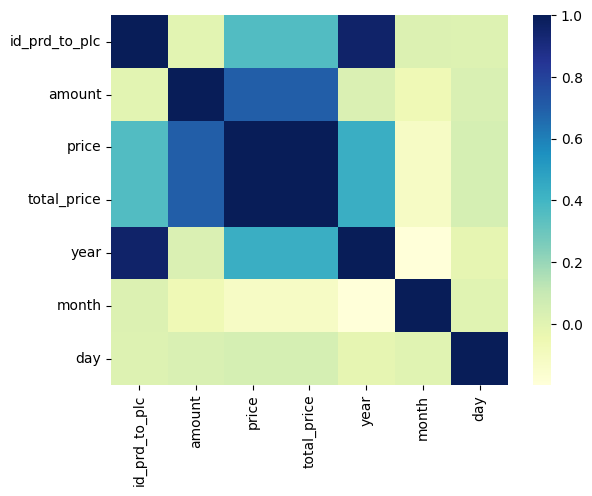

In [6]:
sns.heatmap(new_data.drop(['date', 'id_br'], axis=1).corr(), cmap='YlGnBu')

In [114]:
X = new_data[['id_prd_to_plc', 'year', 'month', 'day']]
y = new_data['total_price']

## Set Normalize

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create model

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
np.random.seed(42)
modelRFR = RandomForestRegressor(2000, criterion='absolute_error')
modelRFR.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=2000)

## Evaluation Model

In [119]:
preds_rfr = modelRFR.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(preds_rfr, y_test)
np.sqrt(error)

78407127.3740824

In [ ]:
78407127.3740824

In [121]:
preds_rfr.sum()

19509536566.25

In [122]:
y_test.sum()

21445533000.0

In [123]:
y_test.sum() - preds_rfr.sum()

1935996433.75

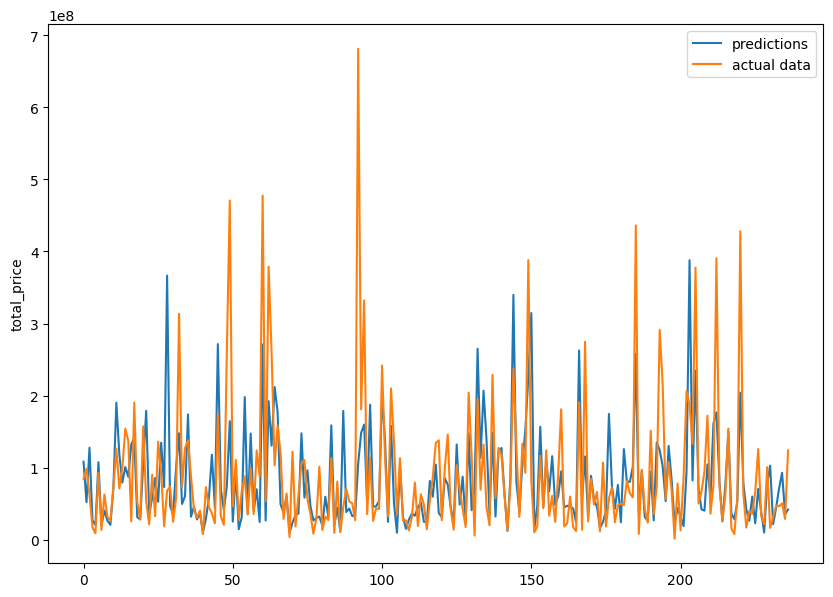

In [124]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=range(len(preds_rfr)), y=preds_rfr, label='predictions')
sns.lineplot(x=range(len(preds_rfr)), y=y_test, label='actual data')
plt.legend()

### Create data for test

In [125]:
new_data.head(-5)

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-15-1397-1397,1397,51238,28.0,62910000.0,62910000.0,2018,11,15
1,2018-11-16-1397-1397,1397,51238,22.0,65050000.0,65050000.0,2018,11,16
2,2018-11-17-1397-1397,1397,51238,12.0,35150000.0,35150000.0,2018,11,17
3,2018-11-18-1397-1397,1397,51238,2.0,1560000.0,1560000.0,2018,11,18
4,2018-11-19-1397-1397,1397,51238,10.0,29900000.0,29900000.0,2018,11,19
...,...,...,...,...,...,...,...,...,...
1569,2023-08-18-1402-1402,1402,51238,27.0,272762000.0,272762000.0,2023,8,18
1570,2023-08-19-1402-1402,1402,51238,6.0,52970000.0,52970000.0,2023,8,19
1571,2023-08-20-1402-1402,1402,51238,17.0,151114000.0,151114000.0,2023,8,20
1572,2023-08-21-1402-1402,1402,51238,6.0,55730000.0,55730000.0,2023,8,21


In [136]:
month = new_data.iloc[968: 998]
month.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
968,2021-12-01-1400-1400,1400,51238,10.0,69900000.0,69900000.0,2021,12,1
969,2021-12-02-1400-1400,1400,51238,9.0,89650000.0,89650000.0,2021,12,2
970,2021-12-03-1400-1400,1400,51238,10.0,63350000.0,63350000.0,2021,12,3
971,2021-12-04-1400-1400,1400,51238,1.0,3950000.0,3950000.0,2021,12,4
972,2021-12-05-1400-1400,1400,51238,7.0,46850000.0,46850000.0,2021,12,5


RMSE: 72644961.54698232


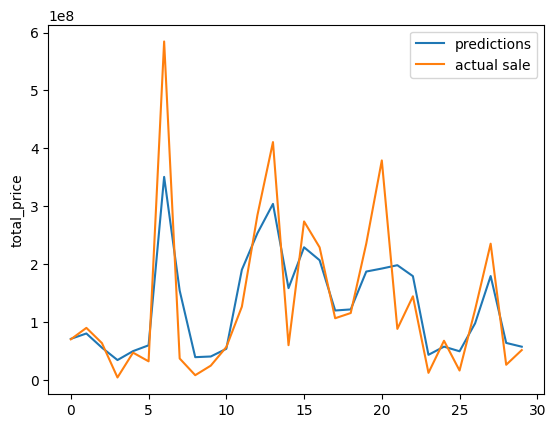

In [137]:
x_month = month[['id_prd_to_plc', 'year', 'month', 'day']]
x_month = scaler.transform(x_month)
sale_predict = modelRFR.predict(x_month)
actual_sale = month['total_price']
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
sns.lineplot(x=range(lenght), y=actual_sale, label='actual sale')
error = np.sqrt(mean_squared_error(actual_sale, sale_predict))
print(f"RMSE: {error}")
plt.legend()

In [138]:
sum_actual_sale = month['total_price'].sum()
sum_predict_sale = sale_predict.sum()
print(f"Actual sale:    {sum_actual_sale}")
print(f"Predicted sale: {sum_predict_sale}")
print(f"Act-pred:      {sum_actual_sale-sum_predict_sale:.0f}")

Actual sale:    3995950000.0
Predicted sale: 3871664797.5
Act-pred:      124285202


## Save Model

In [133]:
import pickle 
filename_scaler = "bamland_scaler.pickle"
filename_model = "bamland_predictor.pickle"

pickle.dump(scaler, open(filename_scaler, "wb"))
pickle.dump(modelRFR, open(filename_model, "wb"))

## Convert miladi be shamsi

In [185]:
def jalali_to_gregorian(jy, jm, jd):
 jy += 1595
 days = -355668 + (365 * jy) + ((jy // 33) * 8) + (((jy % 33) + 3) // 4) + jd
 if (jm < 7):
  days += (jm - 1) * 31
 else:
  days += ((jm - 7) * 30) + 186
 gy = 400 * (days // 146097)
 days %= 146097
 if (days > 36524):
  days -= 1
  gy += 100 * (days // 36524)
  days %= 36524
  if (days >= 365):
   days += 1
 gy += 4 * (days // 1461)
 days %= 1461
 if (days > 365):
  gy += ((days - 1) // 365)
  days = (days - 1) % 365
 gd = days + 1
 if ((gy % 4 == 0 and gy % 100 != 0) or (gy % 400 == 0)):
  kab = 29
 else:
  kab = 28
 sal_a = [0, 31, kab, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
 gm = 0
 while (gm < 13 and gd > sal_a[gm]):
  gd -= sal_a[gm]
  gm += 1
 return [gy, gm, gd]

## Create dataframe from dates between 2 dates

In [268]:
import pandas as pd
from datetime import date, timedelta

def create_date_dataframe(start_date, end_date) -> pd.DataFrame :
    
    '''
        Takes 2 date and return a dataframe from date 1 to date 2
        `Parameters`:
        `date1` : Start period time date that you want in shamsi hijri format
        `date2` : End period time date that you want in shamsi hijri format
    
        `return`: The dataframe contains all days from start_date to end_date
    '''
    
    # Convert the input date lists to datetime objects
    start_date = date(*start_date)
    end_date = date(*end_date)

    # Initialize an empty list to store date tuples
    date_list = []

    # Create a date range using timedelta and append each date as a tuple
    current_date = start_date
    while current_date <= end_date:
        id_prd = {'2018':1397, '2019':1398, '2020':1399, '2021':1400, '2022':1401, '2023':1402, '2024':1403, '2025':1404, '2026':1405}
        id_prd_to_plc = id_prd[str(current_date.year)]
        date_list.append((id_prd_to_plc, current_date.year, current_date.month, current_date.day))
        current_date += timedelta(days=1)

    # Convert the list of date tuples to a DataFrame
    date_df = pd.DataFrame(date_list, columns=["id_prd_to_plc", "year", "month", "day"])

    return date_df

In [269]:
# Example usage:
start_date = [2023, 8, 1]
end_date = [2023, 9, 5]

date_dataframe = create_date_dataframe(start_date, end_date)
date_dataframe.head()

,id_prd_to_plc,year,month,day
0,1402,2023,8,1
1,1402,2023,8,2
2,1402,2023,8,3
3,1402,2023,8,4
4,1402,2023,8,5


In [272]:
def make_period_time(date1:list, date2:list=None):
    """
        Converts hijri shamsi date to gregorian and return dataframe using `create_date_dataframe`
    """
    date1_grg = jalali_to_gregorian(date1[0], date1[1], date1[2])
    date2_grg = jalali_to_gregorian(date2[0], date2[1], date2[2])
    
    df = create_date_dataframe(date1_grg, date2_grg)
    return df

In [273]:
# Example 
# Example usage:
start_date = [1402, 7, 1]
end_date = [1402, 7, 31]

df = make_period_time(start_date, end_date)
df.head()

,id_prd_to_plc,year,month,day
0,1402,2023,9,23
1,1402,2023,9,24
2,1402,2023,9,25
3,1402,2023,9,26
4,1402,2023,9,27


## Pass the StartTime and EndTime and let the AI take predcitions

In [286]:
def predict_period_time(start_date, end_date):
    period_time = make_period_time(start_date, end_date)
    inputs = scaler.transform(period_time)
    predictions = modelRFR.predict(inputs)
    sns.lineplot(x=range(len(predictions)), y=predictions, label='Sales Prediction');
    return predictions, predictions.sum()

(array([2.18764174e+08, 3.63098498e+08, 4.75580597e+08, 2.68742746e+08,
        2.36287116e+08, 2.28114110e+08, 2.16606257e+08, 2.11092597e+08,
        1.80381084e+08, 1.69867254e+08, 2.07681757e+08, 2.44129572e+08,
        1.83512302e+08, 1.52626556e+08, 1.45454956e+08, 1.46004922e+08,
        1.47857971e+08, 1.60384540e+08, 2.26979676e+08, 2.14762461e+08,
        1.67063748e+08, 1.26895610e+08, 1.23348063e+08, 1.49673162e+08,
        1.93621675e+08, 1.94120470e+08, 1.38151333e+08, 1.22093253e+08,
        1.14538288e+08, 1.32575950e+08, 2.13224818e+08]),
 6073235516.0)

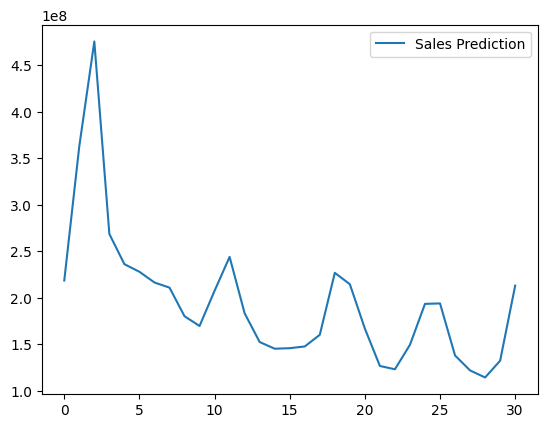

In [288]:
# Example 
# Example usage:
start_date = [1402, 7, 1]
end_date = [1402, 7, 31]

predict_period_time(start_date, end_date)